### Data Cleaning for Research Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
credits = pd.read_csv('data/credits.csv')
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


### Checking Nulls in credits.csv

In [4]:
print('Number of null person_id: ', len(credits[credits['person_id'].isnull()]))
print('Number of null id: ', len(credits[credits['id'].isnull()]))
print('Number of null name: ', len(credits[credits['name'].isnull()]))
print('Number of null character: ', len(credits[credits['character'].isnull()]))
print('Number of null role: ', len(credits[credits['role'].isnull()]))

Number of null person_id:  0
Number of null id:  0
Number of null name:  0
Number of null character:  9772
Number of null role:  0


The only column that has null values in `credits.csv` is `character`, but for now it's okay to leave these null values in because it is not a crucial variable for our intended analysis.

### Checking Nulls in titles.csv

In [5]:
print('Number of null id: ', len(titles[titles['id'].isnull()]))
print('Number of null title: ', len(titles[titles['title'].isnull()]))
print('Number of null release_year: ', len(titles[titles['release_year'].isnull()]))

Number of null id:  0
Number of null title:  1
Number of null release_year:  0


In [6]:
titles = titles[titles['title'].notnull()]
print('Number of null title: ', len(titles[titles['title'].isnull()]))
titles.head()

Number of null title:  0


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


There was only 1 observation that had a null title, so we removed this from the dataframe and will create a new csv file with the non-null values.

Additionally, we want to filter the data to only include movies produced in the US or Great Britain so that we filter to only English titles as much as possible.

In [7]:
english_mask = titles['production_countries'].apply(lambda x: ('US' in x)  or ('GB' in x) or ('CA' in x))
titles = titles[english_mask]
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [8]:
# titles.to_csv('data/titles_clean.csv')

### Selecting Genres and Titles from titles_clean.csv
First we find the genres with the most movies and shows listed. Then we pull the title IDs of all English-language productions under each of these genres.

In [9]:
from ast import literal_eval

titles_clean = pd.read_csv('data/titles_clean.csv', converters={'genres': literal_eval})
titles_clean.head()

,Unnamed: 0,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,[documentation],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"[drama, action, thriller, european]",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"[fantasy, action, comedy]",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"[war, action]","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [10]:
titles_clean['genres']
for i, l in enumerate(titles_clean['genres']):
 print(type(l))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

The 'genres' column contains lists, so in order to count the 5 most commonly occurring genres we have to extract each item in the lists.

In [11]:
individual_genres = pd.Series([x for lst in titles_clean['genres'] for x in lst])
individual_genres.value_counts()

comedy           1116
drama            1048
documentation     659
thriller          522
action            505
family            427
crime             400
animation         364
scifi             311
fantasy           305
romance           276
horror            200
european          166
music             154
reality           151
history           135
war                89
sport              89
western            35
dtype: int64

Here we can see that the 5 most common genres are: comedy, drama, documentation, thriller, and action. We plot them below to visualize their frequencies in comparison to all other genres.

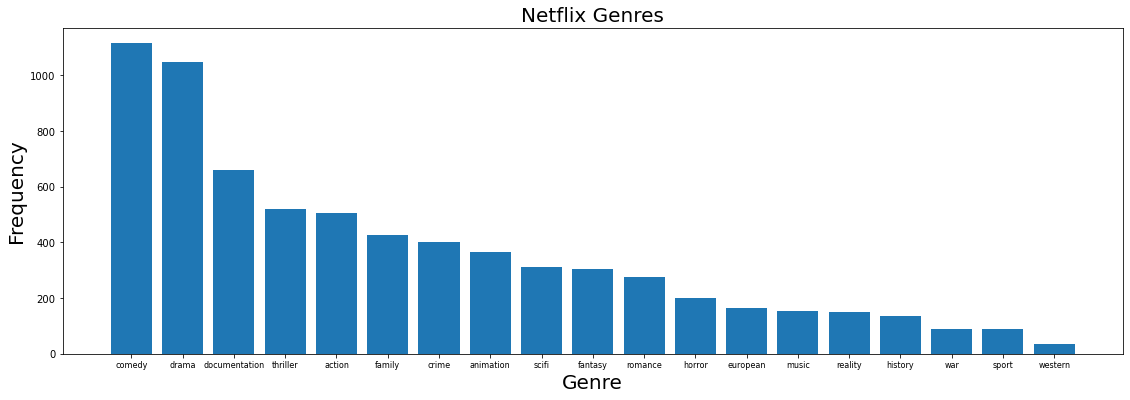

In [12]:
fig, ax = plt.subplots(figsize = (19,6))
ax.bar(individual_genres.value_counts().index, individual_genres.value_counts().values)
ax.set_ylabel("Frequency", size = 20)
ax.set_xlabel("Genre", size = 20)
ax.set_title("Netflix Genres", size = 20)
plt.tick_params(axis='x', which='major', labelsize=8)

In [13]:
# check if a string is in a list, where each list is a value of the titles_clean Dataframe
# titles_with_genres = titles_clean.query('genres.contains('drama')')['title']

Next, we filter the dataset to only look at titles with these top 5 genres.

In [14]:
top_genres_mask = titles_clean['genres'].apply(lambda x: ('comedy' in x)  or ('drama' in x) or ('documentation' in x) or ('thriller' in x) or ('action' in x))
titles_top_genres = titles_clean[top_genres_mask]
titles_top_genres.head()

,Unnamed: 0,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,[documentation],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"[drama, action, thriller, european]",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"[fantasy, action, comedy]",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"[war, action]","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


Now that we have the titles from the top 5 genres, we will combine this with the credits dataframe on the movie ID so that we can see the actors and directors for each title.

In [15]:
titles_and_credits = pd.merge(titles_top_genres, credits, on = 'id')
titles_and_credits.head()

,Unnamed: 0,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3748,Robert De Niro,Travis Bickle,ACTOR
1,1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,14658,Jodie Foster,Iris Steensma,ACTOR
2,1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,7064,Albert Brooks,Tom,ACTOR
3,1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,Betsy,ACTOR


In [16]:
# titles_and_credits.to_csv('data/titles_and_credits.csv')